In [5]:
#Python
# Import the libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Read the csv file into a dataframe
df = pd.read_csv('C:/Users/profe/Documents/Ironhack/IMDB Geo Insights Project/Data/imdb_top_1000.csv')

# Display the first five rows of the dataframe
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [6]:
# Check the shape, size and info of the dataframe
df.shape # (1000, 16)
df.size # 16000
df.info() # No missing values, some columns are of object type

# Drop the Poster_Link column as it is not relevant for analysis
df = df.drop("Poster_Link", axis=1)

# Convert the Released_Year column to numeric type
df["Released_Year"] = pd.to_numeric(df["Released_Year"], errors="coerce")

# Convert the Runtime column to numeric type by removing the "min" suffix
df["Runtime"] = df["Runtime"].str.replace(" min", "").astype(int)

# Convert the IMDB_Rating column to numeric type
df["IMDB_Rating"] = pd.to_numeric(df["IMDB_Rating"], errors="coerce")

# Convert the Meta_score column to numeric type
df["Meta_score"] = pd.to_numeric(df["Meta_score"], errors="coerce")

# Convert the No_of_Votes column to numeric type
df["No_of_Votes"] = pd.to_numeric(df["No_of_Votes"], errors="coerce")

# Convert the Gross column to numeric type by removing the "," separator
df["Gross"] = df["Gross"].str.replace(",", "").astype(float)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


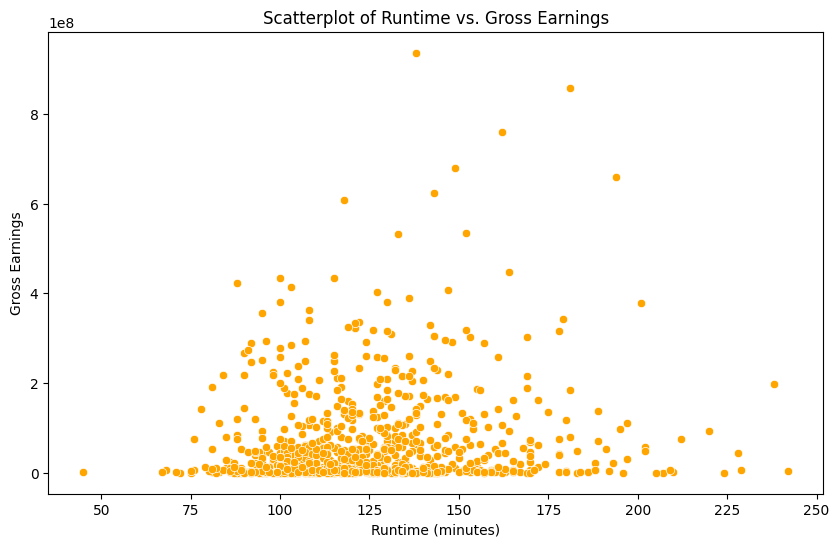

In [7]:
# Scatterplot of Runtime vs. Gross Earnings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Runtime', y='Gross', data=df, color='orange')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Gross Earnings')
plt.title('Scatterplot of Runtime vs. Gross Earnings')
plt.savefig('SP_runtime_vs_GE.png')
plt.show()

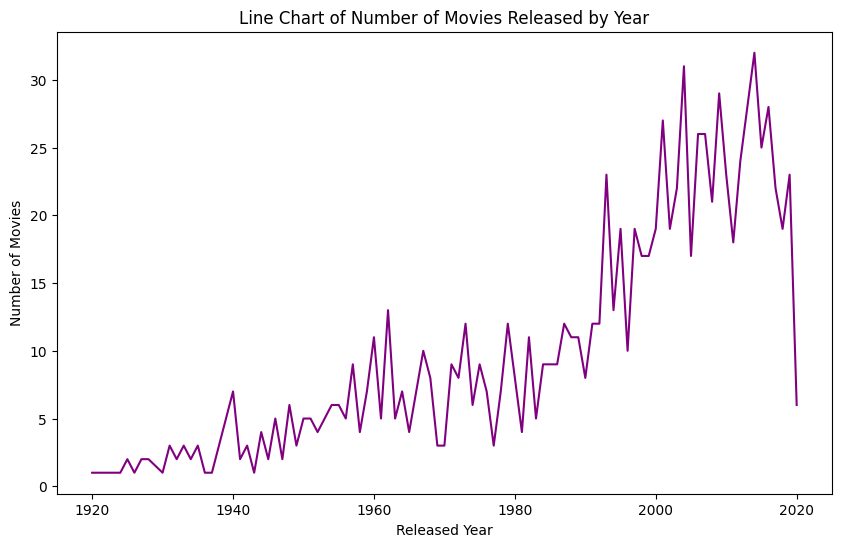

In [8]:
# Count the number of movies per year
movies_per_year = df.groupby('Released_Year')['Series_Title'].count().reset_index()

# Plot a line chart of the number of movies released by year
plt.figure(figsize=(10,6))
sns.lineplot(x='Released_Year', y='Series_Title', data=movies_per_year, color='purple')
plt.xlabel('Released Year')
plt.ylabel('Number of Movies')
plt.title('Line Chart of Number of Movies Released by Year')
plt.savefig('Line_Chart_of_Number_of_Movies_Released_by_Year.png')
plt.show()

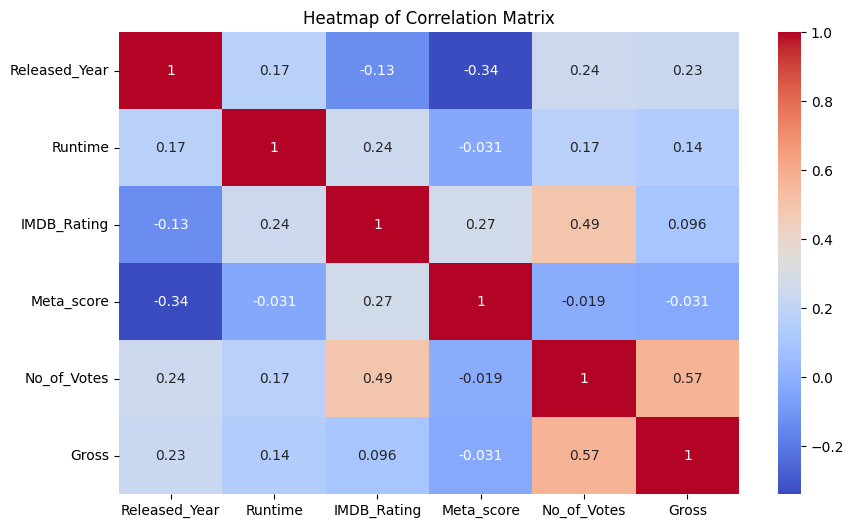

In [10]:
# Compute correlation matrix
correlation_matrix = df.corr(numeric_only=True)  # ensure numeric columns only

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.savefig('Heatmap_of_Correlation_Matrix.png')
plt.show()

In [ ]:
# DataFrame is named 'df' and has a column 'genre'
genre_counts = df['Genre'].value_counts()

# Plotting the counts
plt.figure(figsize=(15, 10))
sns.barplot(x=genre_counts.index, y=genre_counts.values, color='green')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Bar Chart of Genre Counts')
plt.xticks(rotation=45)
plt.savefig('Bar_Chart_of_Genre_Counts.png')
plt.show()

KeyError: 'Genre'

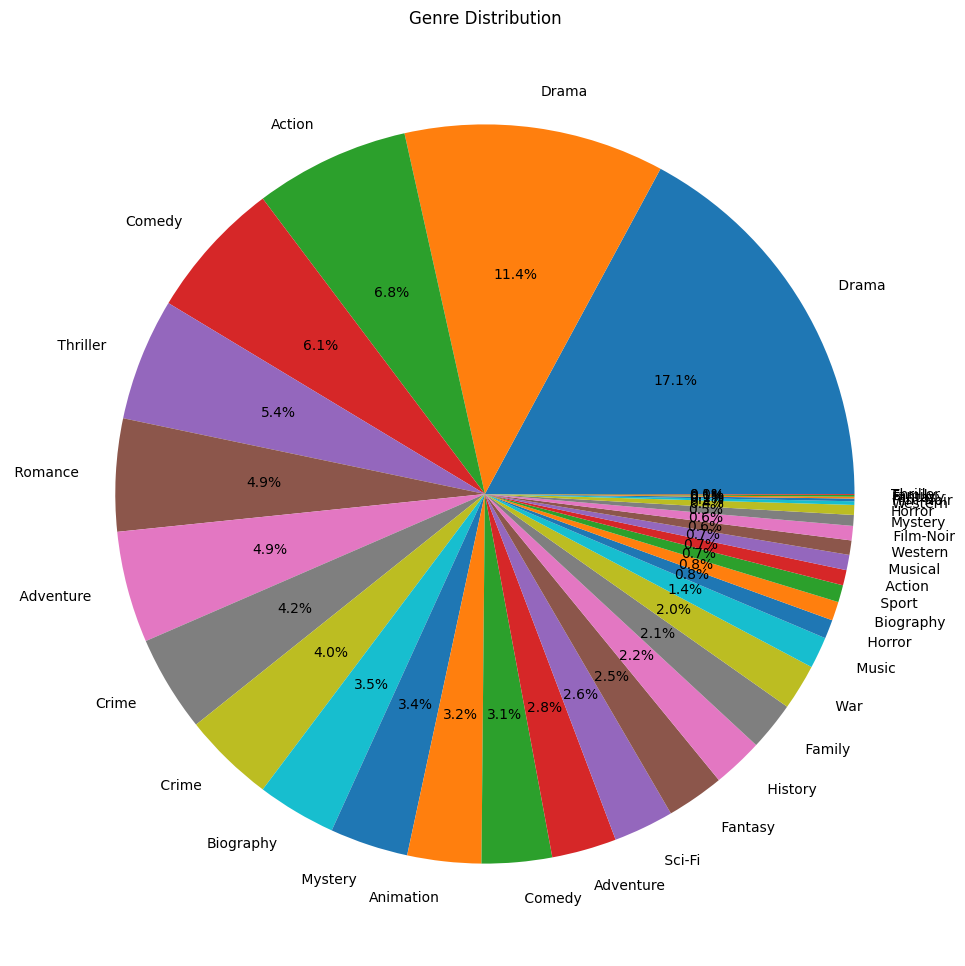

In [ ]:
# Look at the genres and plot a pie chart for distribution
genre_distribution = df['Genre'].str.split(',').explode().value_counts()

plt.figure(figsize=(15, 12))
genre_distribution.plot.pie(autopct='%1.1f%%')
plt.title('Genre Distribution')
plt.ylabel('')
plt.savefig('Genre_Distribution.png')
plt.show()

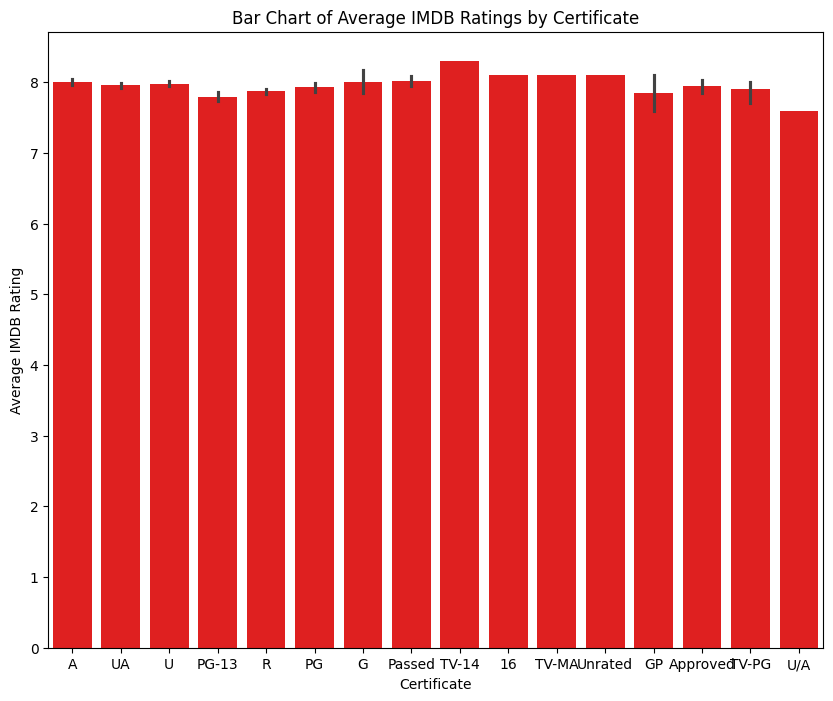

In [ ]:
# Plot a bar chart of the average IMDB ratings by certificate
plt.figure(figsize=(10,8)) # Set the figure size
sns.barplot(x=df['Certificate'], y=df['IMDB_Rating'], color='red') # Plot the bar chart with red color
plt.xlabel('Certificate') # Set the x-axis label
plt.ylabel('Average IMDB Rating') # Set the y-axis label
plt.title('Bar Chart of Average IMDB Ratings by Certificate') # Set the title
plt.savefig('Average_IMDB_Ratings_by_Certificate.png')
plt.show() # Show the plot

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
C:\Users\profe\AppData\Local\Temp\ipykernel_45744\4138904541.py:5: SyntaxWarning: invalid escape sequence '\$'
  df['Gross'] = df['Gross'].replace('[\$,M]', '', regex=True).astype(float)


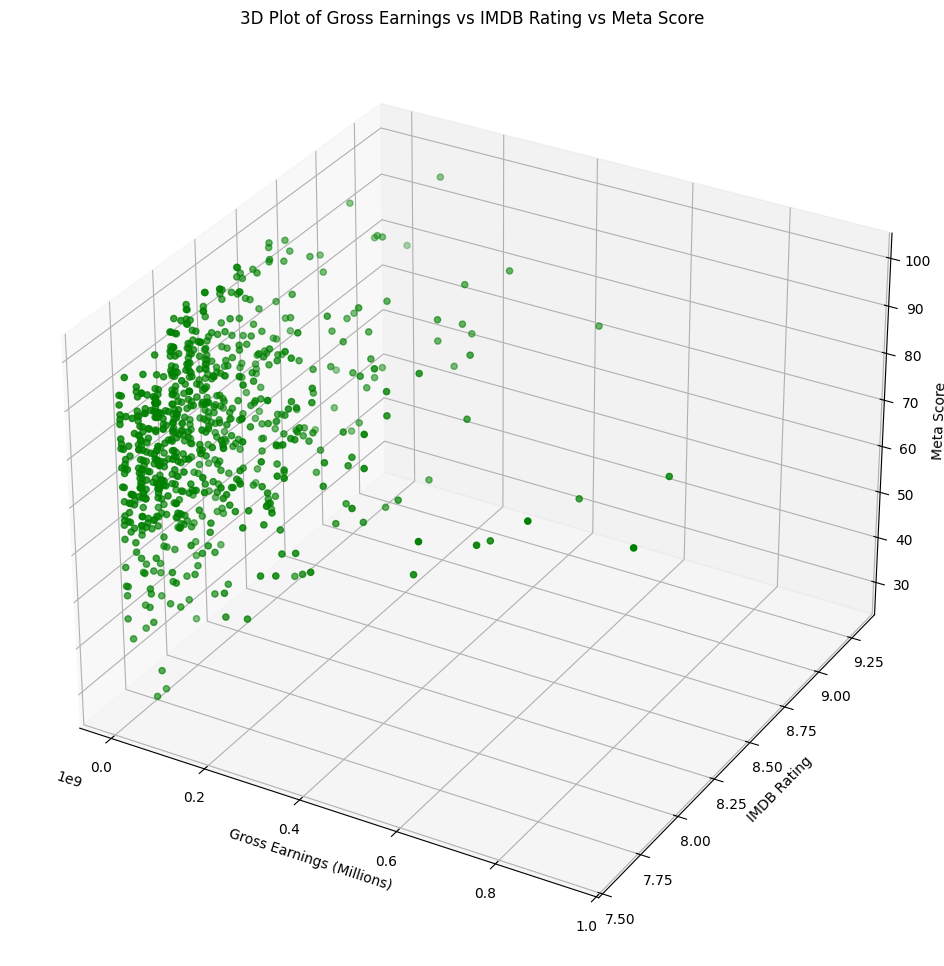

In [ ]:
# Clean the data: remove rows with missing or invalid values
df = df[['Gross', 'IMDB_Rating', 'Meta_score']].dropna()

# Convert 'Gross' to numeric if needed (remove symbols like '$' and 'M')
df['Gross'] = df['Gross'].replace('[\$,M]', '', regex=True).astype(float)

# Plotting
fig = plt.figure(figsize=(14, 12))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['Gross'], df['IMDB_Rating'], df['Meta_score'], c='green', marker='o')

# Labels
ax.set_xlabel('Gross Earnings (Millions)')
ax.set_ylabel('IMDB Rating')
ax.set_zlabel('Meta Score')
ax.set_title('3D Plot of Gross Earnings vs IMDB Rating vs Meta Score')

plt.show()